In [312]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import copy
#from LONR import LONR, MDP
import LONR

import tensorflow as tf 

# import GridWorld

import importlib
importlib.reload(LONR)

<module 'LONR' from 'C:\\Users\\mike\\Desktop\\School\\Thesis Stuff\\Clean\\LONRGeneral\\LONR.py'>

In [213]:
tf.reset_default_graph() 
x = tf.placeholder('float',name='X')
y=  tf.placeholder('float',name='y')
addition = tf.add(x,y, name='add')
tf.summary.scalar('addition', addition)
summary_op = tf.summary.merge_all()     
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for i in range(100):
        var1 =  1.0
        var2 =  float(i)
        #print(var1,var2)
        add, s_ = sess.run([addition, summary_op], feed_dict={x:var1,y:var2})
        writer.add_summary(s_, i)

In [191]:
tf.reset_default_graph()   # To clear the defined variables and operations of the previous cell
# create graph
a = tf.constant(2)
b = tf.constant(3)
c = tf.add(a, b)
# creating the writer out of the session
# writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
# launch the graph in a session
with tf.Session() as sess:
    # or creating the writer inside the session
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(c))
print("Done")

5
Done


In [201]:
tf.reset_default_graph()   # To clear the defined variables and operations of the previous cell

value = [0, 1, 2, 3, 4, 5, 6, 7]
# value = np.array(value)
# value = value.reshape([2, 4])
#init = tf.constant_initializer(value)
x_scalar = tf.placeholder(tf.float32, [None, 1], name='InputData')

# create the scalar variable
#x_scalar = tf.get_variable('x_scalar', shape=[1,8], initializer=init)
# ____step 1:____ create the scalar summary
first_summary = tf.summary.scalar(name='My_first_scalar_summary', tensor=x_scalar)
init = tf.global_variables_initializer()
# launch the graph in a session
with tf.Session() as sess:
    # ____step 2:____ creating the writer inside the session
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for step in range(8):
        # loop over several initializations of the variable
        sess.run(init)
        # ____step 3:____ evaluate the scalar summary
        summary = sess.run(first_summary)
        # ____step 4:____ add the summary to the writer (i.e. to the event file)
        writer.add_summary(summary, step)
    print('Done with writing the scalar summary')

TypeError: 'Operation' object does not support indexing

In [313]:

import numpy as np

#from LONRGeneral.LONR import *

class Grid(MDP):
    """Creates GridWorld

        Grid is referenced by single index, starting from upper left corner.

        Example grid indices:

        -------------------------
        |  0  |  1  |  2  |  3  |
        |     |     |     |     |
        -------------------------
        |  4  |  5  |  6  |  7  |
        |     |     |     |     |
        -------------------------

    """

    def __init__(self, noise=0.0, startState=None):
        super().__init__(startState=startState)

        # One player MDP
        self.N = 1

        # Action direction constants
        self.UP = 0
        self.RIGHT = 1
        self.DOWN = 2
        self.LEFT = 3

        # Dimensions
        self.rows = 2
        self.cols = 3

        self.rows = 4
        self.cols = 12

        self.numberOfStates = self.rows * self.cols
        self.numberOfActions = 4
        self.N = 1

        # Non-determinism - this value is split between sideways moves
        self.noise = noise

        self.grid = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
                     ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
                     ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
                     ' ', -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 0]

        # self.Q = np.zeros((self.N, self.numberOfStates, self.numberOfActions))
        # self.Q_bu = np.zeros((self.N, self.numberOfStates, self.numberOfActions))
        # self.QSums = np.zeros((self.N, self.numberOfStates, self.numberOfActions))
        #
        # # Policies
        # self.pi = np.zeros((self.N, self.numberOfStates, self.numberOfActions))  # policy (if needed)
        # self.pi_sums = np.zeros((self.N, self.numberOfStates, self.numberOfActions))
        #
        # # Regret Sums
        # self.regret_sums = np.zeros((self.N, self.numberOfStates, self.numberOfActions))  # regret_sum (if needed)
        #
        # for n in range(self.N):
        #     for s in range(self.numberOfStates):
        #         for a in range(self.numberOfActions):
        #             self.pi[n][s][a] = 1.0 / self.numberOfActions

        
        self.Q = {}
        self.Q_bu = {}
        self.QSums = {}
        self.pi = {}
        self.pi_sums = {}
        self.regret_sums = {}
        for n in range(self.N):
            self.Q[n] = {}
            self.Q_bu[n] = {}
            self.QSums[n] = {}
            self.pi[n] = {}
            self.pi_sums[n] = {}
            self.regret_sums[n] = {}
            for s in self.getStates():
                self.Q[n][s] = {}
                self.Q_bu[n][s] = {}
                self.QSums[n][s] = {}
                self.pi[n][s] = {}
                self.regret_sums[n][s] = {}
                self.pi_sums[n][s] = {}
                for a in self.getActions(s,0):
                    self.Q[n][s][a] = 0.0
                    self.Q_bu[n][s][a] = 0.0
                    self.QSums[n][s][a] = 0.0
                    self.pi[n][s][a] = 1.0 / 4.0  # len(list(total_actions.keys())
                    self.regret_sums[n][s][a] = 0.0
                    self.pi_sums[n][s][a] = 0.0

        # self.grid = [' ', ' ', ' ',
        #              ' ', ' ', 10]

        self.livingReward = -1.0

    def getActions(self, s, n):
        return [self.UP, self.RIGHT, self.DOWN, self.LEFT]

    def getStates(self):
        return list(range(self.rows * self.cols))

    def getStateRep(self, s):
        return s

    def getReward(self, s, a_current, n, a_notN):
        """ Return reward from leaving state s.

            Not dependent on action or s'
        """
        cell = self.grid[s]
        if type(cell) == int or type(cell) == float:
            return float(cell)
        return self.livingReward


    # Only needed for O-LONR
    def getMove(self, s, action):
        """  Get s_prime given s, action
        """

        succs = self.getNextStatesAndProbs(s, action, 0)

        # Get a move based on Transition probs
        actionChoices = []
        actionProbs = []
        for state, prob, reward in succs:
            actionChoices.append(state)
            actionProbs.append(prob)

        next_state = np.random.choice(actionChoices, p=actionProbs)
        return next_state

    def isTerminal(self, s):
        """Returns True if s is a terminal state.
        """
        return type(self.grid[s]) == int or type(self.grid[s]) == float

    def _applyAction(self, s, action):
        """Returns x,y of new state when in state s and taking action a
        """
        x = s // self.cols
        y = s % self.cols

        if action == self.UP:
            return (x - 1, y)
        elif action == self.RIGHT:
            return (x, y + 1)
        elif action == self.DOWN:
            return (x + 1, y)
        elif action == self.LEFT:
            return (x, y - 1)

    def _isValidMove(self, x, y):
        """ Check is x,y is valid location.

        """
        if x < 0 or x >= self.rows: return False
        if y < 0 or y >= self.cols: return False
        return True

    def XYToState(self, x, y):
        return x * self.cols + y


    def getNextStatesAndProbs(self, state, action, n_current):
        """ Returns a list of [Action, resulting state, transition probability]
        """

        #convert to coordinates
        x = state // self.cols
        y = state % self.cols


        successors = []

        # UP
        if self._isValidMove(x-1, y):
            upState = self.XYToState(x-1, y)
        else:
            upState = state

        # LEFT
        if self._isValidMove(x, y-1):
            leftState = self.XYToState(x, y-1)
        else:
            leftState = state

        # DOWN
        if self._isValidMove(x+1, y):
            downState = self.XYToState(x+1, y)
        else:
            downState = state

        # RIGHT
        if self._isValidMove(x, y+1):
            rightState = self.XYToState(x, y+1)
        else:
            rightState = state

        # Return the correct one
        if action == self.UP or action == self.DOWN:
            if action == self.UP:
                successors.append([upState,1.0-self.noise, self.getReward(state,action,0,0)])
            else:
                successors.append([downState,1.0-self.noise, self.getReward(state,action,0,0)])

            massLeft = self.noise
            if massLeft > 0.0:
                successors.append([leftState,massLeft/2.0, self.getReward(state,action,0,0)])
                successors.append([rightState,massLeft/2.0, self.getReward(state,action,0,0)])

        if action == self.LEFT or action == self.RIGHT:
            if action == self.LEFT:
                successors.append([leftState,1.0-self.noise, self.getReward(state,action,0,0)])
            else:
                successors.append([rightState,1.0-self.noise, self.getReward(state,action,0,0)])

            massLeft = self.noise
            if massLeft > 0.0:
                successors.append([upState,massLeft/2.0, self.getReward(state,action,0,0)])
                successors.append([downState,massLeft/2.0, self.getReward(state,action,0,0)])

        return successors

LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  10
     rm+:  False
    DCFR:  False
      VI:  True
Starting training..
Iteration:  1000  alpha:  1.0
Iteration:  2000  alpha:  1.0

QSums
[-1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.499998740467872, -7.9999962769679955, -8.437909766035641, -8.823915073915899, -9.167030903142793, -9.474029276661593, -9.750327812828512]


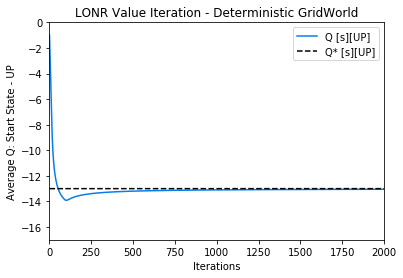

Final Value: 
-13.048818351423682


In [287]:
# TF STUFF



totalIters = 2000
gridMDP = Grid(noise=0.0)
lonrAgent = LONR.LONR(M=gridMDP, gamma=1.0, alpha=1.0, DCFR=False, VI=True, randomize=False)

lonrAgent.GRIDWORLD = True
QStarValue = -13.0

QSums, iters = lonrAgent.lonr_value_iteration(iterations=totalIters, log=1000)

# print(gridMDP.Q[0][36])
# print(gridMDP.Q[0][35])

print("")
print("QSums")
print(QSums[0:20])

QStar = []
for i in range(1, totalIters+1):
    QStar.append(QStarValue)
    
#plt.figure(figsize=(9,7))
plt.plot(iters, QSums, color='#077ded', label='Q [s][UP]')
plt.plot(iters, QStar, 'k--', label='Q* [s][UP]')
plt.legend(loc='upper right')
#plt.axis([50, 650, 106, 115])
plt.axis([0, totalIters, -17.0, 0])
plt.xlabel('Iterations') #TOTAL iterations
plt.ylabel('Average Q: Start State - UP')
plt.title('LONR Value Iteration - Deterministic GridWorld')
plt.savefig('LONR-VI-DETERM-GW.png')
plt.show()

print("Final Value: ")
print(float(QSums[-1]))

tf.reset_default_graph() 
x = tf.placeholder('float',name='X')
y =  tf.placeholder('float',name='y')
addition = tf.add(x,y, name='add')
x2 = tf.placeholder('float',name='X2')
y2 =  tf.placeholder('float',name='y2')
#addition2 = tf.add(x2,y2, name='add')
tf.summary.scalar('addition', addition)
summary_op = tf.summary.merge_all()    

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer1 = tf.summary.FileWriter('./graphs/plot1', sess.graph)
    writer2 = tf.summary.FileWriter('./graphs/plot2', sess.graph)
    for i in range(1, totalIters+1):
        var1 =  0.0
        var2 =  float(QSums[i-1])
        add, s_ = sess.run([addition, summary_op], feed_dict={x:var1,y:var2})
        writer1.add_summary(s_, global_step=i)
        
        var21 =  0.0
        var22 =  float(QStarValue)
        add, s_ = sess.run([addition, summary_op], feed_dict={x:var21,y:var22})
        writer2.add_summary(s_, global_step=i)


# GRIDWORLD VALUE ITERATION DETERMINISTIC

LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  10
     rm+:  False
    DCFR:  False
      VI:  True
    EXP3:  False
exp3gama:  0.5
Starting training..
Iteration:  1000  alpha:  1.0
Iteration:  2000  alpha:  1.0


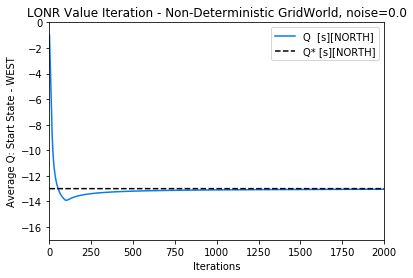

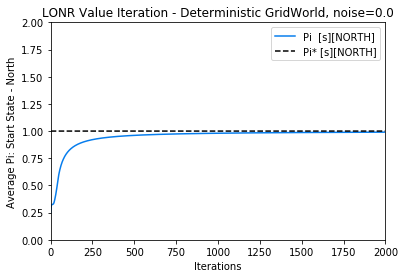

Final Value: 
-13.048818351423682
[0.980341068609697, 0.9803606883017033, 0.9803802688716916, 0.9803998104365605, 0.980419313112743, 0.9804387770162095, 0.9804582022624695, 0.9804775889665741, 0.9804969372431187, 0.9805162472062443, 0.9805355189696406, 0.9805547526465481, 0.9805739483497599, 0.980593106191624, 0.9806122262840461, 0.9806313087384909, 0.980650353665985, 0.9806693611771186, 0.9806883313820478, 0.9807072643904968]


In [314]:
iters = []
QSums = []
totalIters = 2000
totalPlots = 10


gridMDP = Grid(noise=0.0)
lonrAgent = LONR.LONR(M=gridMDP, gamma=1.0, alpha=1.0, DCFR=False, VI=True, randomize=False)

lonrAgent.GRIDWORLD = True
#QStarValue = -29.77
QStarValue = -13.0
PiStarValue = 1.0

QSums,PISums, iters = lonrAgent.lonr_value_iteration(iterations=totalIters, log=1000)

    
QStar = []
for i in range(1, totalIters+1):
    QStar.append(QStarValue)
    
PiStar = []
for i in range(1, totalIters+1):
    PiStar.append(PiStarValue)

# QAvg PLOT
# for p in range(totalPlots):
#     plt.plot(iters, QSums[p], 'r-')#, label='Q [s][WEST]')
plt.plot(iters, QSums, color='#077ded', label='Q  [s][NORTH]')
plt.plot(iters, QStar, 'k--', label='Q* [s][NORTH]')
plt.legend(loc='upper right')
plt.axis([0, totalIters, -17.0, 0])
#plt.axis([0, totalIters, -35.0, 0])
plt.xlabel('Iterations') #TOTAL iterations
plt.ylabel('Average Q: Start State - WEST')
plt.title('LONR Value Iteration - Non-Deterministic GridWorld, noise=0.0')
#plt.savefig('LONR-VI-NONDETERM-GW.png')
plt.show()

# PiAvg PLOT
# for p in range(totalPlots):
#     plt.plot(iters, QSums[p], 'r-')#, label='Q [s][WEST]')
plt.plot(iters, PISums, color='#077ded', label='Pi  [s][NORTH]')
plt.plot(iters, PiStar, 'k--', label='Pi* [s][NORTH]')
plt.legend(loc='upper right')
plt.axis([0, totalIters, 0.0, 2.0])
#plt.axis([0, totalIters, -35.0, 0])
plt.xlabel('Iterations') #TOTAL iterations
plt.ylabel('Average Pi: Start State - North')
plt.title('LONR Value Iteration - Deterministic GridWorld, noise=0.0')
#plt.savefig('LONR-VI-NONDETERM-GW.png')
plt.show()

print("Final Value: ")
print(float(QSums[-1]))

print(PISums[1000:1020])

# GRID WORLD VALUE ITERATION NON-DETERMINISTIC

LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  10
     rm+:  False
    DCFR:  False
      VI:  True
    EXP3:  False
exp3gama:  0.5
Starting training..
Iteration:  1000  alpha:  1.0


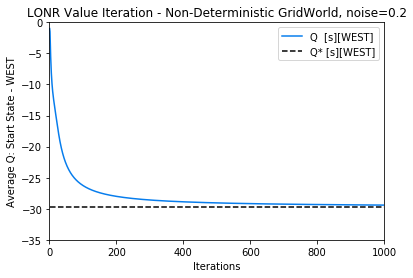

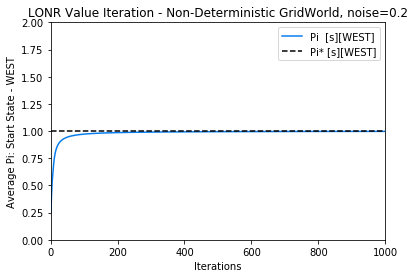

Final Value: 
-29.414053231224397
[0.25, 0.3522727272727273, 0.42139293496196323, 0.4862324643080931, 0.5398782097705896, 0.5830714696546838, 0.6204836294678256, 0.6553790449649824, 0.690453126350341, 0.7214078137153068, 0.7467343761048244, 0.7678398447627557, 0.7856983182425437, 0.8010055812252191, 0.8142718758102045, 0.8258798835720668, 0.8361222433619452, 0.8452265631751704, 0.8533725335343719, 0.8607039068576533, 0.8673370541501461, 0.8733671880524121, 0.878872962484916, 0.8839199223813777, 0.8885631254861227, 0.8928491591212718, 0.8968177087834469, 0.9005027906126095, 0.9039337288673471, 0.9071359379051022, 0.9101315528113892, 0.9129399417860333, 0.9155781253682748, 0.9180611216809725, 0.9204022324900876, 0.9226132815875852, 0.9247048145176504, 0.9266862667671859, 0.9285661060808479, 0.9303519534288267, 0.932050686272026, 0.933668527075073, 0.935211119468676, 0.936683594026206, 0.9380906252700681, 0.9394364812424579, 0.9407250667479375, 0.9419599611906889, 0.943144451778634, 0.944

In [315]:
iters = []
QSums = []
totalIters = 1000
totalPlots = 10


gridMDP = Grid(noise=0.2)
lonrAgent = LONR.LONR(M=gridMDP, gamma=1.0, alpha=1.0, DCFR=False, VI=True, randomize=False)

lonrAgent.GRIDWORLD = True
QStarValue = -29.77
PiStarValue = 1.0

QSums, PISums, iters = lonrAgent.lonr_value_iteration(iterations=totalIters, log=1000)

    
QStar = []
for i in range(1, totalIters+1):
    QStar.append(QStarValue)
    
PiStar = []
for i in range(1, totalIters+1):
    PiStar.append(PiStarValue)

# QAvg PLOT
# for p in range(totalPlots):
#     plt.plot(iters, QSums[p], 'r-')#, label='Q [s][WEST]')
plt.plot(iters, QSums, color='#077ded', label='Q  [s][WEST]')
plt.plot(iters, QStar, 'k--', label='Q* [s][WEST]')
plt.legend(loc='upper right')
plt.axis([0, totalIters, -35.0, 0])
plt.xlabel('Iterations') #TOTAL iterations
plt.ylabel('Average Q: Start State - WEST')
plt.title('LONR Value Iteration - Non-Deterministic GridWorld, noise=0.2')
#plt.savefig('LONR-VI-NONDETERM-GW.png')
plt.show()

# PiAvg PLOT
# for p in range(totalPlots):
#     plt.plot(iters, QSums[p], 'r-')#, label='Q [s][WEST]')
plt.plot(iters, PISums, color='#077ded', label='Pi  [s][WEST]')
plt.plot(iters, PiStar, 'k--', label='Pi* [s][WEST]')
plt.legend(loc='upper right')
plt.axis([0, totalIters, 0.0, 2.0])
#plt.axis([0, totalIters, -35.0, 0])
plt.xlabel('Iterations') #TOTAL iterations
plt.ylabel('Average Pi: Start State - WEST')
plt.title('LONR Value Iteration - Non-Deterministic GridWorld, noise=0.2')
#plt.savefig('LONR-VI-NONDETERM-GW.png')
plt.show()

print("Final Value: ")
print(float(QSums[-1]))

print(PISums[0:120])

# ONLINE DETERMINISTIC

Iteration:  0
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  1
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  2
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  3
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  4
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  5
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  6
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  7
Starting training..
Iteration:  5000  alpha: 1.0
Iteration:  10000  alpha: 1.0
Iteration:  15000  alpha: 1.0
Iteration:  8
St

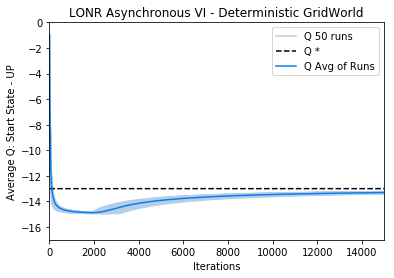

Final Value: 
-13.343826666302062


In [280]:
iters = []
QSums = []
totalIters = 15000
totalPlots = 50
QSumsPlots = []

for p in range(totalPlots):
    print("Iteration: ", p)
    gridMDP = Grid(noise=0.0, startState=36)

    lonrAgent = LONR.LONR(M=gridMDP, gamma=1.0, alpha=1.0, epsilon=20, alphaDecay=1.0, RMPLUS=False, DCFR=False, VI=False, showSettings=False)
    lonrAgent.GRIDWORLD = True
    QStarValue = -13.0


    QSums, iters = lonrAgent.lonr_online(iterations=totalIters, log=5000)
    QSumsPlots.append(QSums)
    
QStar = []
for i in range(1, totalIters+1):
    QStar.append(QStarValue)

data = np.array(QSumsPlots)    
data = np.average(data, axis=0)

# print(QSumsPlots[0][0:5])
# print(QSumsPlots[1][0:5])
# print(data[0:5])
    
#plot(x, y, color='green', linestyle='dashed', marker='o' markerfacecolor='blue', markersize=12)
    
for p in range(totalPlots):
    plt.plot(iters, QSumsPlots[p], color='#b7cfe6', linestyle='solid')#, label='Q [s][UP]')
plt.plot(iters, QSumsPlots[0], color='#b7cfe6', linestyle='solid', label='Q 50 runs')
plt.plot(iters, QStar, 'k--', label='Q *')
plt.plot(iters, data, color='#077ded', linestyle='solid', label='Q Avg of Runs')



plt.legend(loc='upper right')

plt.axis([0, totalIters, -17.0, 0])
plt.xlabel('Iterations') 
plt.ylabel('Average Q: Start State - UP')
plt.title('LONR Asynchronous VI - Deterministic GridWorld')
plt.savefig('LONR-AVI-DETERM-GW.png')
plt.show()

#print(QSums)

print("Final Value: ")
print(float(QSums[-1]))

# LONR Online - Non - Deterministic GridWorld

LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  20
     rm+:  False
    DCFR:  False
      VI:  False
Starting training..
Iteration:  1000  alpha: 1.0
LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  20
     rm+:  False
    DCFR:  False
      VI:  False
Starting training..
Iteration:  1000  alpha: 1.0
LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  20
     rm+:  False
    DCFR:  False
      VI:  False
Starting training..
Iteration:  1000  alpha: 1.0
LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  20
     rm+:  False
    DCFR:  False
      VI:  False
Starting training..
Iteration:  1000  alpha: 1.0
LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  20
     rm+:  False
    DCFR:  False
      VI:  False
Starting training..
Iteration:  1000  alpha: 1.0
LONR initialized with:
   gamma:  1.0
   alpha:  1.0
 epsilon:  20
     rm+:  False
    DCFR:  False
      VI:  False
Starting training..
Iteration:  1000  alpha: 1.

Iteration:  1000  alpha: 1.0


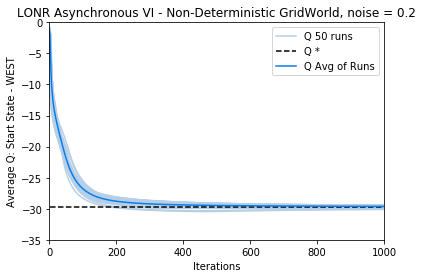

Final Value: 
-29.84325478583908


In [281]:
iters = []
QSums = []
totalIters = 1000
totalPlots = 50
QSumsPlots = []

for p in range(totalPlots):
    gridMDP = Grid(noise=0.20, startState=36)

    lonrAgent = LONR.LONR(M=gridMDP, gamma=1.0, alpha=1.0, epsilon=20, alphaDecay=1.0, RMPLUS=False, DCFR=False, VI=False)
    lonrAgent.GRIDWORLD = True
    QStarValue = -29.77

    QSums, iters = lonrAgent.lonr_online(iterations=totalIters, log=1000)
    QSumsPlots.append(QSums)

QStar = []
for i in range(1, totalIters+1):
    QStar.append(QStarValue)

data = np.array(QSumsPlots)    
data = np.average(data, axis=0)    
    
# plt.plot(iters, QSums, 'r-', label='Q [s][WEST]')
# plt.plot(iters, QStar, 'k--', label='Q* [s][WEST]')

for p in range(totalPlots):
    plt.plot(iters, QSumsPlots[p], color='#b7cfe6', linestyle='solid')#, label='Q [s][UP]')
plt.plot(iters, QSumsPlots[0], color='#b7cfe6', linestyle='solid', label='Q 50 runs')
plt.plot(iters, QStar, 'k--', label='Q *')
plt.plot(iters, data, color='#077ded', linestyle='solid', label='Q Avg of Runs')

plt.legend(loc='upper right')
plt.axis([0, totalIters, -35.0, 0])
plt.xlabel('Iterations') #TOTAL iterations
plt.ylabel('Average Q: Start State - WEST')
plt.title('LONR Asynchronous VI - Non-Deterministic GridWorld, noise = 0.2')
plt.savefig('LONR-AVI-NONDETERM-GW.png')
plt.show()

#print(QSums)

print("Final Value: ")
print(float(QSums[-1]))